<a href="https://colab.research.google.com/github/JjoshLee23/repo_test/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Data Manipulation

import pandas as pd
import numpy as np
import scipy.stats
df=pd.read_csv("diabetes.csv")

df1=df.reindex(columns=['Outcome','Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']) #reindexing the dataframe

labels=df1['Outcome'] #the values we are trying to predict

variables=df1.iloc[:,1:]

for column in range(8):
  variables.iloc[:,column]=variables.iloc[:,column]/variables.iloc[:,column].max()

print(variables)#used this dataframe when implementing ML methods as it is scaled for KNN

features=variables.iloc[:,1:]



     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1       0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2       0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
3       0.058824  0.447236       0.540984       0.232323  0.111111  0.418778   
4       0.000000  0.688442       0.327869       0.353535  0.198582  0.642325   
..           ...       ...            ...            ...       ...       ...   
763     0.588235  0.507538       0.622951       0.484848  0.212766  0.490313   
764     0.117647  0.613065       0.573770       0.272727  0.000000  0.548435   
765     0.294118  0.608040       0.590164       0.232323  0.132388  0.390462   
766     0.058824  0.633166       0.491803       0.000000  0.000000  0.448584   
767     0.058824  0.467337       0.573770       0.313131  0.000000  0.453055   

     DiabetesPedigreeFunction       Age

In [ ]:
# T - Tests
plist = []
noDiabetes = df1[df1['Outcome'] == 0]
hasDiabetes = df1[df1['Outcome'] == 1]

stat, p = (scipy.stats.ttest_ind(hasDiabetes['Pregnancies'], noDiabetes['Pregnancies']))
plist.append(p) # significant p = 5.065127298053476e-10
stat, p = scipy.stats.ttest_ind(hasDiabetes['Glucose'], noDiabetes['Glucose'])
plist.append(p)# significant p = 8.935431645289913e-43
stat, p = scipy.stats.ttest_ind(hasDiabetes['BloodPressure'], noDiabetes['BloodPressure'])
plist.append(p)# INSIGNIFICANT p = 0.07151390009776082
stat, p = scipy.stats.ttest_ind(hasDiabetes['SkinThickness'], noDiabetes['SkinThickness'])
plist.append(p)# significant p = 0.03834770482049123
stat, p = scipy.stats.ttest_ind(hasDiabetes['Insulin'], noDiabetes['Insulin'])
plist.append(p)# significant p = 0.00028618646036031987
stat, p = scipy.stats.ttest_ind(hasDiabetes['BMI'], noDiabetes['BMI'])
plist.append(p)# significant p = 1.2298074873116022e-16
stat, p = scipy.stats.ttest_ind(hasDiabetes['DiabetesPedigreeFunction'], noDiabetes['DiabetesPedigreeFunction'])
plist.append(p)# significant p = 1.254607010148809e-06
stat, p = scipy.stats.ttest_ind(hasDiabetes['Age'], noDiabetes['Age'])
plist.append(p)# significant p = 2.2099754606654358e-11

p

2.2099754606654358e-11

In [ ]:
# Ramdom Forests

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#trained_features,test_features,trained_labels,test_labels=train_test_split(features,labels,test_size=0.2)

#diabetes_forest=RandomForestClassifier(n_estimators=200)

#diabetes_forest.fit(trained_features,trained_labels)

#diabetes_forest.score(test_features,test_labels) #ACCURACY WAS 0.72 WHICH WAS TOO LOW

#Because of this we switched to KNN to test a different ML model

#K nearest neighbors
nfeatures = variables.drop(columns=['BloodPressure']) #dropped due to the insignificance in the t test

from sklearn.neighbors import KNeighborsClassifier
data_train, data_test, label_train, label_test = train_test_split(nfeatures, labels, test_size=0.4)

nbrs = KNeighborsClassifier(n_neighbors=3).fit(data_train, label_train)

print(nbrs.score(data_test,label_test)) #accuracy was still in the range of 69%-70% which was low, we tried to mess with the parameters

print("\n")
#We implemented cross validation
from sklearn.model_selection import cross_val_score

scores=[]
kvalues=[]
for i in range(1,25):
  nbrs = KNeighborsClassifier(n_neighbors=i)
  # print(np.mean(cross_val_score(nbrs, data_train, label_train)))
  scores.append(np.mean(cross_val_score(nbrs, data_train, label_train)))
  kvalues.append(i)


0.75




In [ ]:
score = 0
kvalue = 0
for i in range(1,25):
  nbrs = KNeighborsClassifier(n_neighbors=i)
  rating = np.mean(cross_val_score(nbrs, data_train, label_train))
  if rating > score:
    score = rating
    kvalue = i

print(score, kvalue)

final=KNeighborsClassifier(n_neighbors=kvalue).fit(data_train,label_train)

print(final.score(data_test,label_test))

print(final.predict(nfeatures.iloc[0:1,:]))

print(final.predict(nfeatures.iloc[1:2,:]))


0.7565217391304349 10
0.7305194805194806
[1]
[0]


In [ ]:
# Correlations of all Outcomes

(df1.corr().sort_values(by='Outcome', ascending=False))

,Outcome,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,1.000000,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356
Glucose,0.466581,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BMI,0.292695,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
Age,0.238356,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000
Pregnancies,0.221898,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
DiabetesPedigreeFunction,0.173844,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Insulin,0.130548,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
SkinThickness,0.074752,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
BloodPressure,0.065068,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528


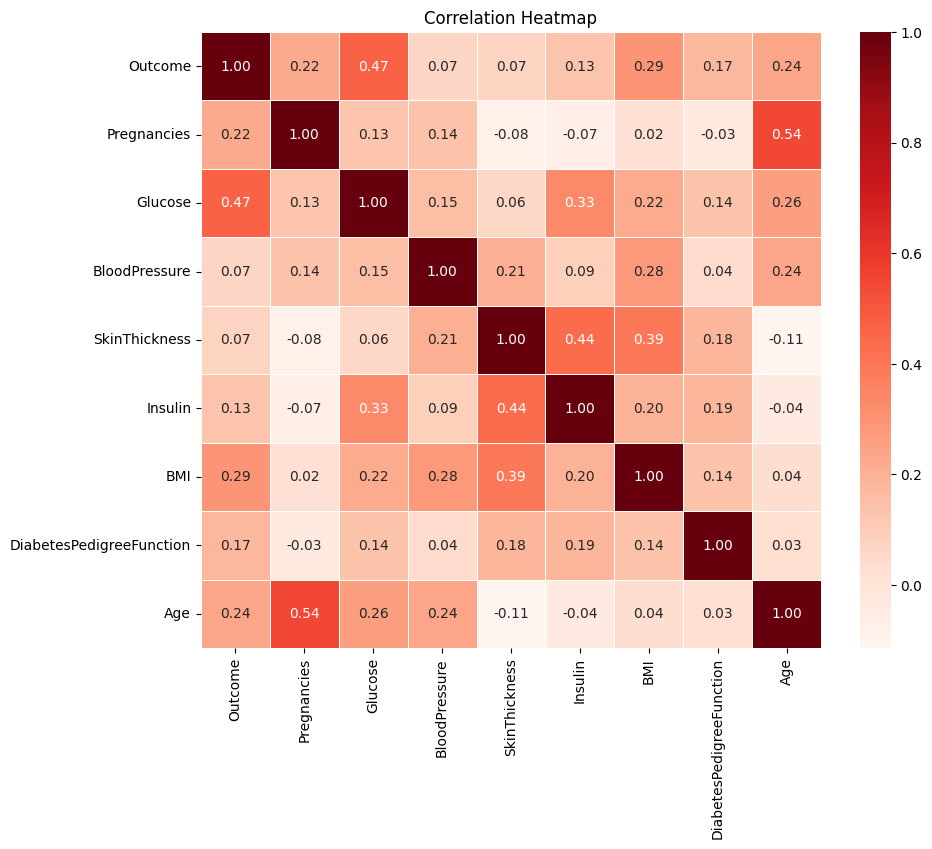

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

correlation_matrix = df1.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="Reds", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


Text(0, 0.5, 'Accuracy Score')

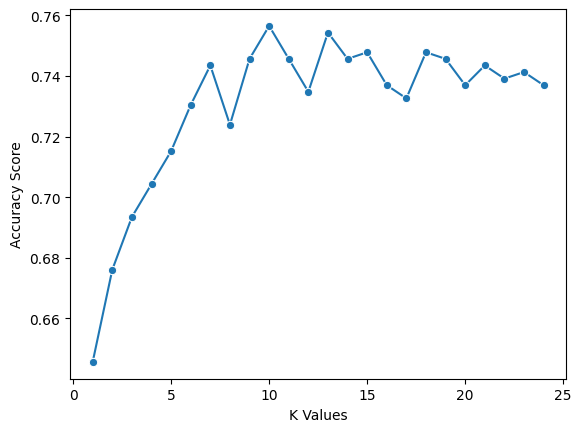

In [ ]:
sns.lineplot(x = kvalues, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

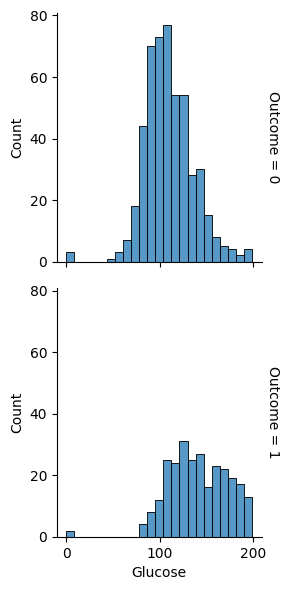

In [ ]:
sns.displot(
    df, x="Glucose", row="Outcome",
    height=3, facet_kws=dict(margin_titles=True),
)

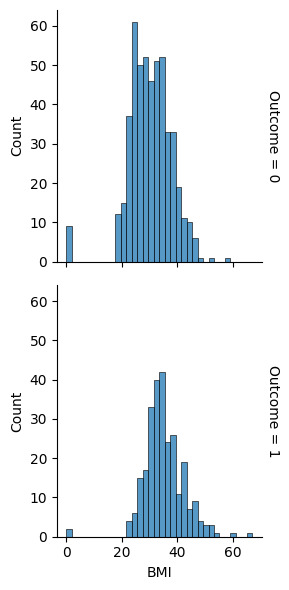

In [ ]:
sns.displot(
    df, x="BMI", row="Outcome",
    height=3, facet_kws=dict(margin_titles=True),
)

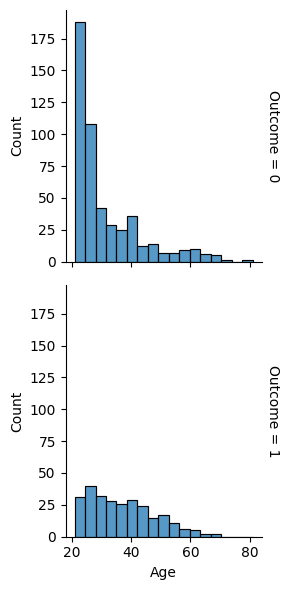

In [ ]:
sns.displot(
    df, x="Age", row="Outcome",
    height=3, facet_kws=dict(margin_titles=True),
)

<Axes: xlabel='Outcome', ylabel='Glucose'>

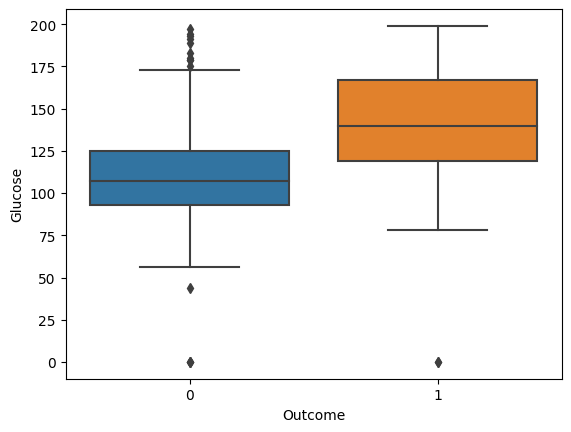

In [ ]:
sns.boxplot(x='Outcome', y='Glucose', data=df)

<Axes: xlabel='Outcome', ylabel='DiabetesPedigreeFunction'>

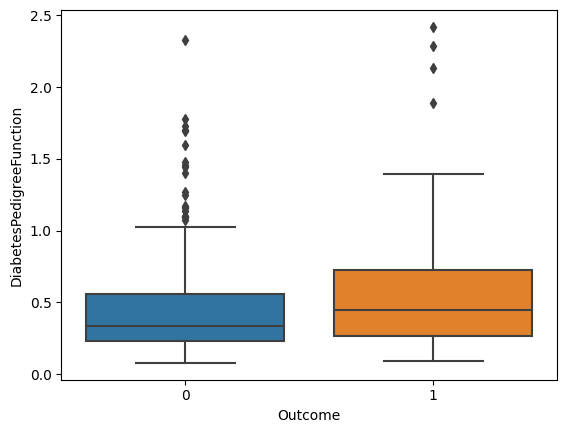

In [ ]:
sns.boxplot(x='Outcome', y='DiabetesPedigreeFunction', data=df)

<Axes: xlabel='Outcome', ylabel='SkinThickness'>

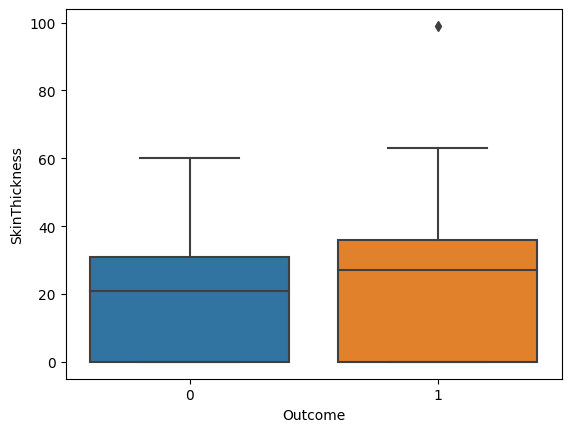

In [ ]:
sns.boxplot(x='Outcome', y='SkinThickness', data=df)

<Axes: xlabel='Outcome', ylabel='BloodPressure'>

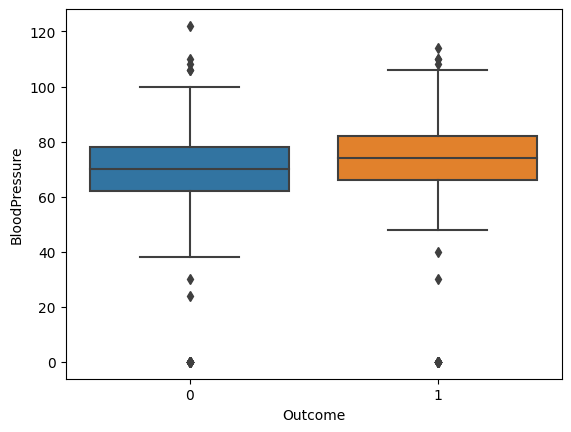

In [ ]:
sns.boxplot(x='Outcome', y='BloodPressure', data=df)

In [ ]:
piv = pd.pivot_table(df1, columns='Outcome', aggfunc=np.mean)

In [ ]:

for i in range(len(plist)):
  roundedval = round(plist[i], 2)
  plist[i] = roundedval
piv['P-Values'] = plist

In [ ]:
piv.iloc[:, 2:]

Outcome,P-Values
Age,0.00
BMI,0.00
BloodPressure,0.07
DiabetesPedigreeFunction,0.04
Glucose,0.00
Insulin,0.00
Pregnancies,0.00
SkinThickness,0.00
